# **A. Linear Regression (using GPU)**

In [13]:
# Import required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
begintime = time.time()

In [14]:
tf.config.list_physical_devices('GPU')

[]

In [15]:
# Define the linear predictor
def prediction(x, w, b):
    return w * x + b

# Define different loss functions
def mse_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

def mae_loss(y_true, y_pred):
    return tf.reduce_mean(tf.abs(y_true - y_pred))

def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = tf.abs(error) <= delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * tf.abs(error) - 0.5 * tf.square(delta)
    return tf.reduce_mean(tf.where(is_small_error, squared_loss, linear_loss))

def hybrid_loss(y_true, y_pred, alpha=0.5):
    mse = mse_loss(y_true, y_pred)
    mae = mae_loss(y_true, y_pred)
    return alpha * mse + (1 - alpha) * mae



In [16]:
# Training loop function
def train_model(X, y, W, b, learning_rate, train_steps, loss_fn=[]): # The different losses are to be passed to the loss_fn array
  history = {}
  for i in loss_fn:
    if i==None: print(f"Specify a loss function")
    elif i: print(f"Training with {i.__name__}")

    key = f"loss_history_{i.__name__}"

    start_time = time.time()
    best_loss = float('inf')

    for step in range(train_steps):
        with tf.GradientTape() as tape:
            pred = prediction(X, W, b)
            loss = i(y, pred)

        gradients = tape.gradient(loss, [W, b])
        W.assign_sub(learning_rate * gradients[0])
        b.assign_sub(learning_rate * gradients[1])

        current_loss = loss.numpy()
        history.setdefault(key, []).append(loss.numpy())

        if current_loss < best_loss:
            best_loss = current_loss
            patience_counter = 0
        else:
            patience_counter += 1

        # If the loss hasn't improved for 'patience' steps, reduce the learning rate.
        if patience_counter >= patience:
            learning_rate *= lr_decay_factor
            print(f"Reducing learning rate to {learning_rate:.6f} at step {i}")
            patience_counter = 0  # Reset the counter after reducing LR

        if step % 100 == 0:
            print(f"Step {step}, Loss: {loss.numpy():.4f}")

    training_time = time.time() - start_time
    print(f"\nTraining completed in {training_time:.2f} seconds")
    print(f"{W, b, history[key]}")
    plot_results(X, y, W, b,  history[key], "Actual vs Predicted Linear Regression Results")

  # Compare all loss functions
  print(history)
  plt.figure(figsize=(10, 6))
  plt.plot(list(history.values())[0], label='MSE')
  plt.plot(list(history.values())[1], label='MAE')
  plt.plot(list(history.values())[2], label='Huber')
  plt.plot(list(history.values())[3], label='Hybrid')
  plt.xlabel('Step')
  plt.ylabel('Loss')
  plt.title('Comparison of Loss Functions')
  plt.legend()
  plt.grid(True)
  plt.show()

In [17]:
# Plot results
def plot_results(X, y, W, b, loss_history, title="Linear Regression Rts"):
    plt.figure(figsize=(12, 5))

    # Plot the data and prediction
    plt.subplot(1, 2, 1)
    plt.scatter(X.numpy(), y.numpy(), alpha=0.5, label='Original Data')
    plt.scatter(X.numpy(), prediction(X, W, b).numpy(), alpha=0.1, label='Predicted Data')

    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(title)
    plt.legend()
    plt.grid(True)

    # Plot the loss history
    plt.subplot(1, 2, 2)
    plt.plot(loss_history, "-")
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Time')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

## SEED

In [18]:
# Converting first name to decimal for seed
NAME = "Damilola"
SEED = sum(ord(c) for c in NAME)
tf.random.set_seed(SEED)
np.random.seed(SEED)


## Using random Normal (Guassian) Noise

Using Normal Noise
Training with mse_loss
Step 0, Loss: 16.0550
Step 100, Loss: 10.6824
Step 200, Loss: 7.1088
Step 300, Loss: 4.7317
Step 400, Loss: 3.1505
Step 500, Loss: 2.0988
Step 600, Loss: 1.3993
Step 700, Loss: 0.9339
Step 800, Loss: 0.6244
Step 900, Loss: 0.4185

Training completed in 3.71 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.638631], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.6266465], dtype=float32)>, [16.055012, 15.989722, 15.924701, 15.859944, 15.79545, 15.731218, 15.667248, 15.603539, 15.540088, 15.476895, 15.4139595, 15.351281, 15.2888565, 15.2266865, 15.16477, 15.1031065, 15.041691, 14.980525, 14.91961, 14.858942, 14.798521, 14.738347, 14.678417, 14.618731, 14.559286, 14.500085, 14.441124, 14.382402, 14.323922, 14.265676, 14.20767, 14.149899, 14.092363, 14.035062, 13.977993, 13.921157, 13.864551, 13.808177, 13.75203, 13.696115, 13.640424, 13.584963, 13.529725, 13.474712, 13.419923, 13.365358

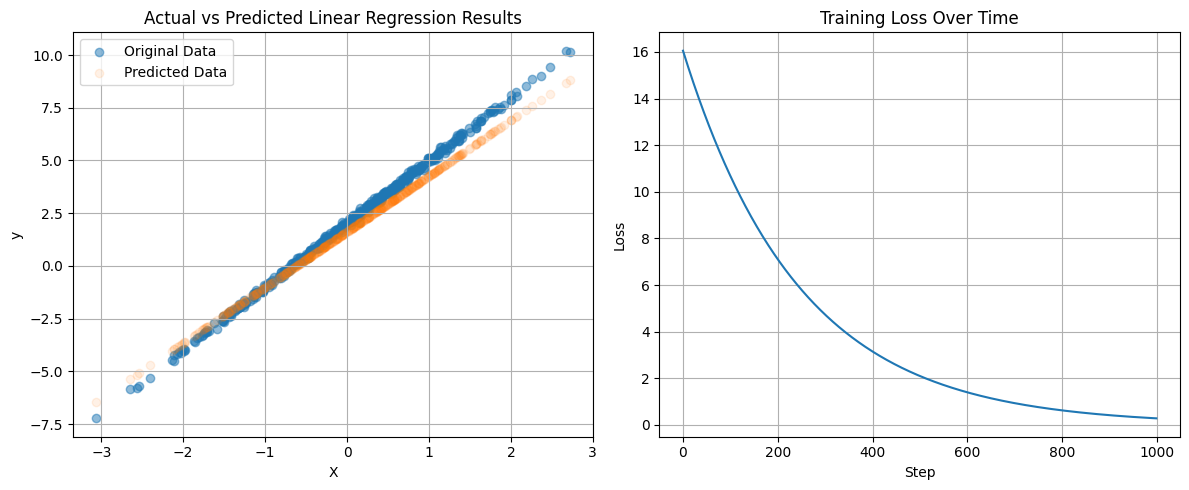

Training with mae_loss
Step 0, Loss: 0.4444
Step 100, Loss: 0.3733
Step 200, Loss: 0.3046
Step 300, Loss: 0.2377
Step 400, Loss: 0.1760
Step 500, Loss: 0.1243
Step 600, Loss: 0.0936
Step 700, Loss: 0.0833
Step 800, Loss: 0.0800
Step 900, Loss: 0.0791

Training completed in 4.21 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.9983952], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.994877], dtype=float32)>, [0.44436166, 0.44364557, 0.44292945, 0.44221336, 0.44149724, 0.44078112, 0.440065, 0.4393489, 0.4386328, 0.43791667, 0.43720058, 0.4364845, 0.43576837, 0.43505225, 0.43433616, 0.43362105, 0.43290746, 0.43219382, 0.43148017, 0.43076658, 0.4300529, 0.42933926, 0.42862567, 0.42791203, 0.42719832, 0.42648476, 0.4257711, 0.42505747, 0.42434385, 0.42363018, 0.42291656, 0.42220291, 0.4214893, 0.4207756, 0.420062, 0.4193484, 0.41863474, 0.41792113, 0.41720745, 0.41649383, 0.41578022, 0.4150666, 0.4143529, 0.41363975, 0.41292685

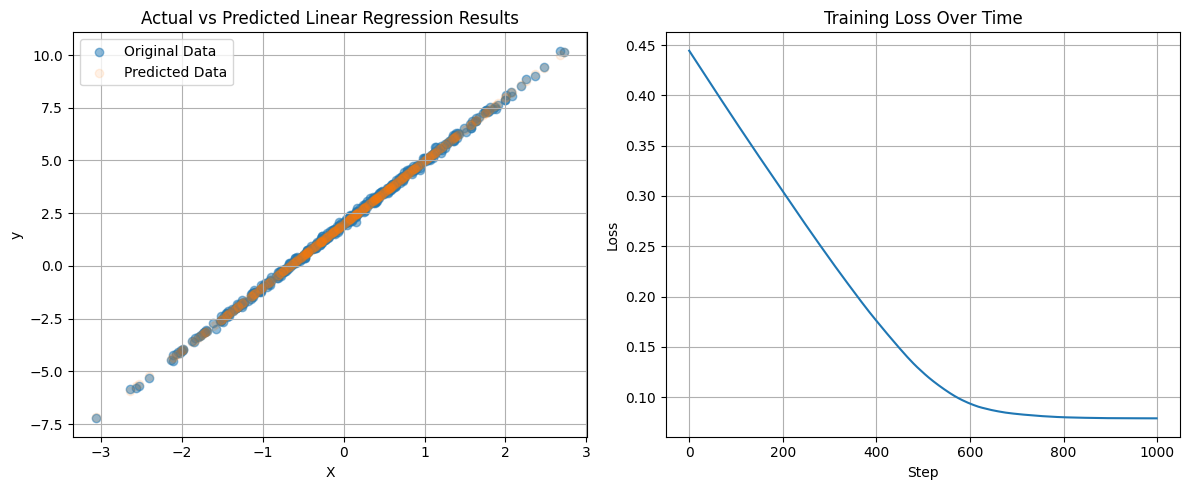

Training with huber_loss
Step 0, Loss: 0.0048
Step 100, Loss: 0.0048
Step 200, Loss: 0.0048
Step 300, Loss: 0.0048
Step 400, Loss: 0.0048
Step 500, Loss: 0.0048
Step 600, Loss: 0.0048
Step 700, Loss: 0.0048
Step 800, Loss: 0.0048
Step 900, Loss: 0.0048

Training completed in 7.00 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.9972544], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.997843], dtype=float32)>, [0.0047760922, 0.004776067, 0.0047760424, 0.004776018, 0.004775993, 0.004775968, 0.0047759456, 0.0047759204, 0.004775895, 0.004775871, 0.004775846, 0.004775822, 0.004775797, 0.004775772, 0.004775748, 0.0047757244, 0.0047757, 0.0047756764, 0.0047756513, 0.0047756275, 0.0047756033, 0.00477558, 0.0047755563, 0.004775532, 0.0047755092, 0.0047754855, 0.004775463, 0.0047754394, 0.004775414, 0.0047753924, 0.0047753677, 0.0047753435, 0.0047753206, 0.0047752983, 0.004775274, 0.0047752513, 0.0047752275, 0.004775205, 0.004775181

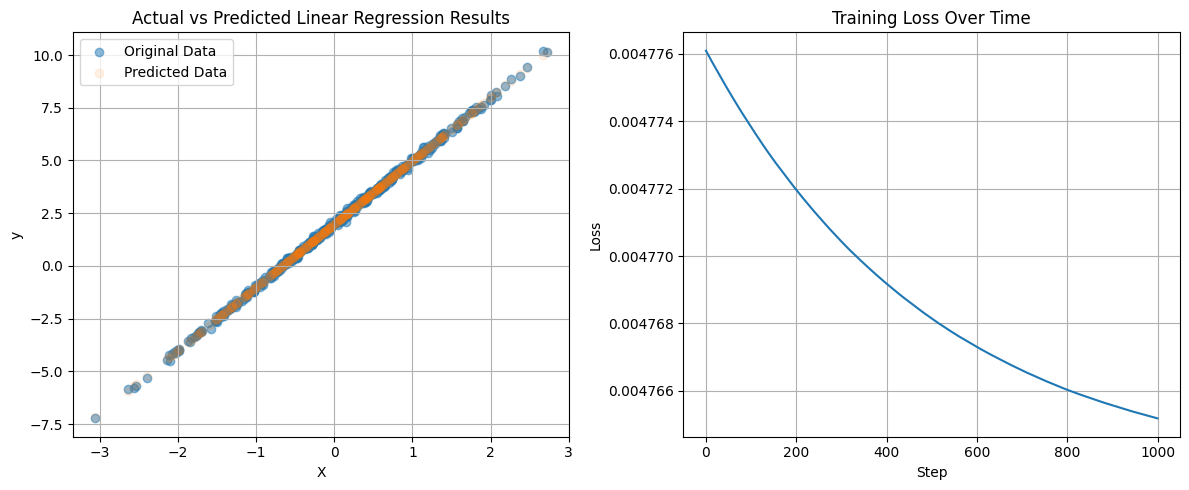

Training with hybrid_loss
Step 0, Loss: 0.0443
Step 100, Loss: 0.0442
Step 200, Loss: 0.0442
Step 300, Loss: 0.0442
Step 400, Loss: 0.0442
Step 500, Loss: 0.0442
Step 600, Loss: 0.0442
Step 700, Loss: 0.0442
Step 800, Loss: 0.0442
Step 900, Loss: 0.0442

Training completed in 6.13 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([3.0018644], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.996854], dtype=float32)>, [0.04425165, 0.04425133, 0.04425102, 0.04425071, 0.0442504, 0.04425008, 0.044249773, 0.044249464, 0.04424915, 0.04424885, 0.044248544, 0.04424824, 0.044247936, 0.044247624, 0.044247396, 0.044247262, 0.044247113, 0.044246975, 0.044246837, 0.04424669, 0.044246554, 0.044246405, 0.044246275, 0.044246137, 0.04424598, 0.044245858, 0.044245712, 0.044245575, 0.044245437, 0.044245295, 0.04424516, 0.044245027, 0.04424489, 0.044244744, 0.044244613, 0.04424448, 0.044244353, 0.044244207, 0.04424407, 0.04424394, 0.044243798, 0.044

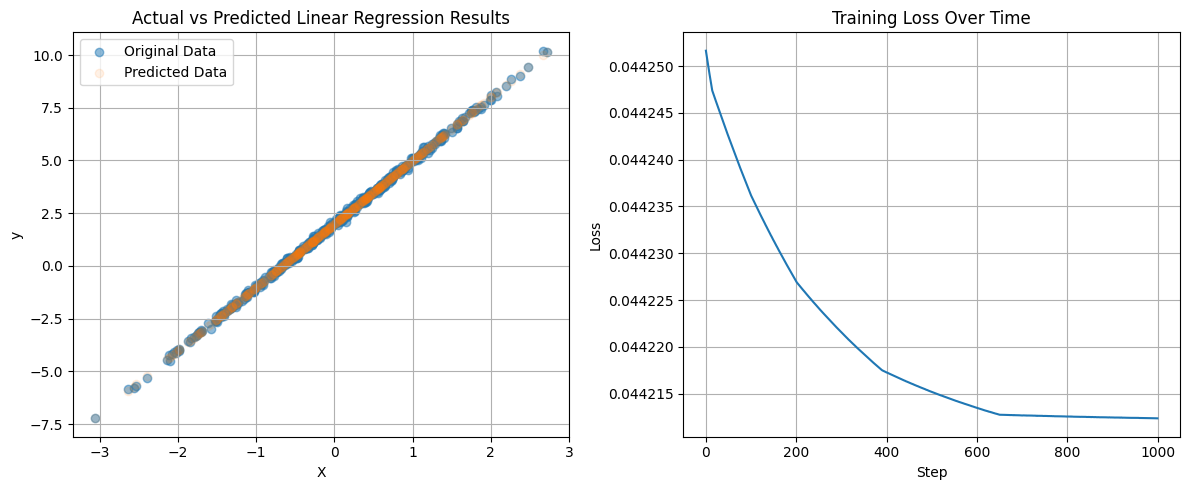

{'loss_history_mse_loss': [16.055012, 15.989722, 15.924701, 15.859944, 15.79545, 15.731218, 15.667248, 15.603539, 15.540088, 15.476895, 15.4139595, 15.351281, 15.2888565, 15.2266865, 15.16477, 15.1031065, 15.041691, 14.980525, 14.91961, 14.858942, 14.798521, 14.738347, 14.678417, 14.618731, 14.559286, 14.500085, 14.441124, 14.382402, 14.323922, 14.265676, 14.20767, 14.149899, 14.092363, 14.035062, 13.977993, 13.921157, 13.864551, 13.808177, 13.75203, 13.696115, 13.640424, 13.584963, 13.529725, 13.474712, 13.419923, 13.365358, 13.311014, 13.256892, 13.20299, 13.149306, 13.095841, 13.042596, 12.989565, 12.936751, 12.8841505, 12.831765, 12.7795925, 12.727632, 12.675882, 12.624344, 12.573016, 12.521897, 12.470985, 12.420281, 12.369782, 12.31949, 12.2694025, 12.219518, 12.169837, 12.1203575, 12.071079, 12.022002, 11.973124, 11.924444, 11.875964, 11.827682, 11.7795925, 11.731702, 11.684006, 11.636504, 11.589195, 11.542078, 11.495154, 11.448419, 11.401875, 11.355521, 11.309357, 11.263378, 11.

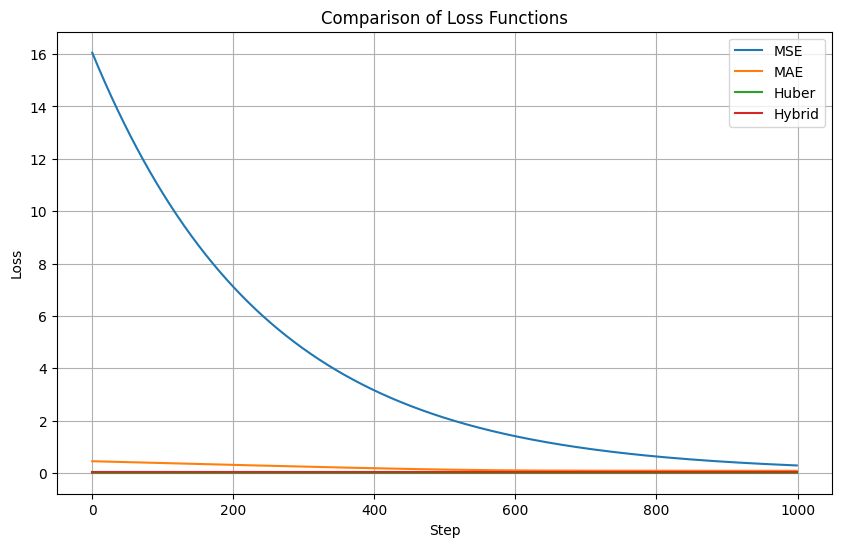

In [19]:
print("Using Normal Noise")
NUM_EXAMPLES = 500
TRAIN_STEPS = 1000
LEARNING_RATE = 0.001
patience = 300            # Number of steps to wait before reducing LR
lr_decay_factor = 0.5

patience_counter = 0
# Generate data with noise
X = tf.random.normal([NUM_EXAMPLES])

# Initialize vweight and bias
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

noise = tf.random.normal([NUM_EXAMPLES], mean=0.0, stddev=0.1)
y = X * 3 + 2 + noise
train_model(X, y, W, b, LEARNING_RATE,
            TRAIN_STEPS,
            loss_fn=[mse_loss, mae_loss, huber_loss, hybrid_loss]
            )

## Using Laplacian noise

Using Laplacian Noise
Training with mse_loss
Step 0, Loss: 9.7137
Step 100, Loss: 6.5652
Step 200, Loss: 4.4378
Step 300, Loss: 3.0002
Step 400, Loss: 2.0288
Step 500, Loss: 1.3725
Step 600, Loss: 0.9289
Step 700, Loss: 0.6292
Step 800, Loss: 0.4267
Step 900, Loss: 0.2899

Training completed in 3.64 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.7378032], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.6441317], dtype=float32)>, [9.713659, 9.675676, 9.637842, 9.600156, 9.562617, 9.525226, 9.48798, 9.45088, 9.413926, 9.377115, 9.34045, 9.3039255, 9.267547, 9.231309, 9.195213, 9.159259, 9.1234455, 9.087771, 9.052237, 9.016841, 8.981584, 8.9464655, 8.911485, 8.876638, 8.841931, 8.807359, 8.7729225, 8.73862, 8.704452, 8.670417, 8.636515, 8.602745, 8.569109, 8.5356045, 8.502231, 8.468987, 8.435873, 8.40289, 8.370035, 8.33731, 8.304711, 8.272241, 8.239897, 8.207679, 8.175588, 8.143622, 8.111782, 8.080067, 8.048474, 8.017006, 7.

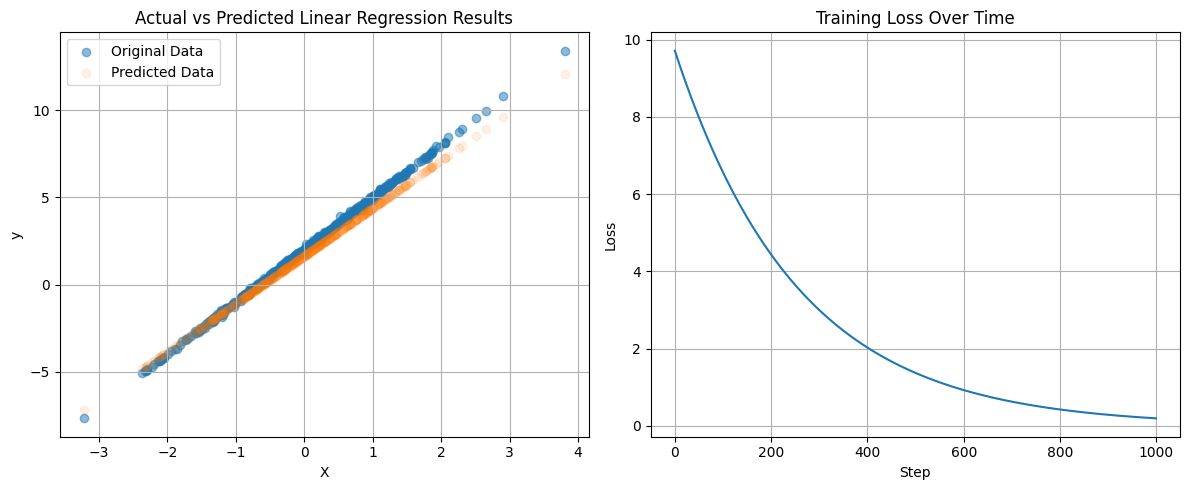

Training with mae_loss
Step 0, Loss: 0.3759
Step 100, Loss: 0.3042
Step 200, Loss: 0.2363
Step 300, Loss: 0.1729
Step 400, Loss: 0.1167
Step 500, Loss: 0.0713
Step 600, Loss: 0.0519
Step 700, Loss: 0.0497
Step 800, Loss: 0.0497
Step 900, Loss: 0.0497

Training completed in 4.48 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.9988096], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.9997532], dtype=float32)>, [0.3758954, 0.3751644, 0.3744334, 0.37370232, 0.37297133, 0.37224033, 0.37150928, 0.37077826, 0.37004724, 0.36931622, 0.36858517, 0.3678542, 0.36712313, 0.3663922, 0.3656611, 0.36493012, 0.3641991, 0.36346808, 0.36273703, 0.362006, 0.36127502, 0.36054397, 0.35981295, 0.35908198, 0.35835153, 0.35762376, 0.3569, 0.35617712, 0.3554562, 0.35473534, 0.35401446, 0.35329354, 0.35257268, 0.35185182, 0.3511309, 0.35041004, 0.34968916, 0.34896827, 0.34824735, 0.3475265, 0.34680557, 0.34608468, 0.34536383, 0.34464294, 0.343922, 0

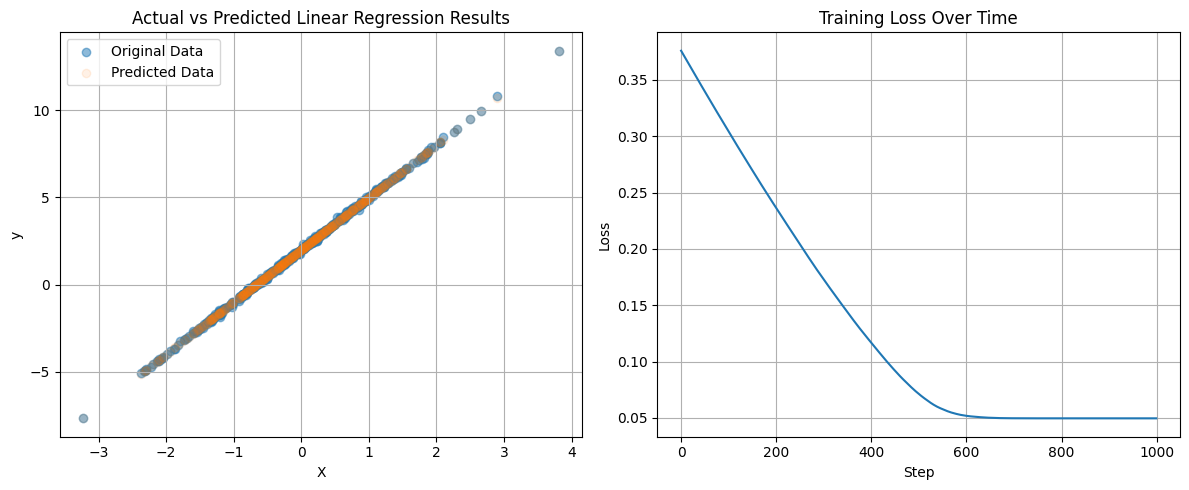

Training with huber_loss
Step 0, Loss: 0.0024
Step 100, Loss: 0.0024
Step 200, Loss: 0.0024
Step 300, Loss: 0.0024
Step 400, Loss: 0.0024
Step 500, Loss: 0.0024
Step 600, Loss: 0.0024
Step 700, Loss: 0.0024
Step 800, Loss: 0.0024
Step 900, Loss: 0.0024

Training completed in 6.99 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.998795], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.0017388], dtype=float32)>, [0.0023750188, 0.0023750085, 0.0023749985, 0.0023749894, 0.0023749801, 0.0023749704, 0.00237496, 0.0023749508, 0.0023749408, 0.0023749312, 0.0023749217, 0.002374912, 0.0023749021, 0.002374892, 0.0023748823, 0.0023748728, 0.0023748635, 0.0023748532, 0.002374844, 0.0023748344, 0.0023748244, 0.0023748158, 0.0023748062, 0.0023747962, 0.0023747862, 0.0023747769, 0.0023747678, 0.0023747582, 0.0023747485, 0.002374739, 0.0023747296, 0.0023747203, 0.00237471, 0.0023747005, 0.0023746921, 0.002374682, 0.0023746735, 0.0023746642,

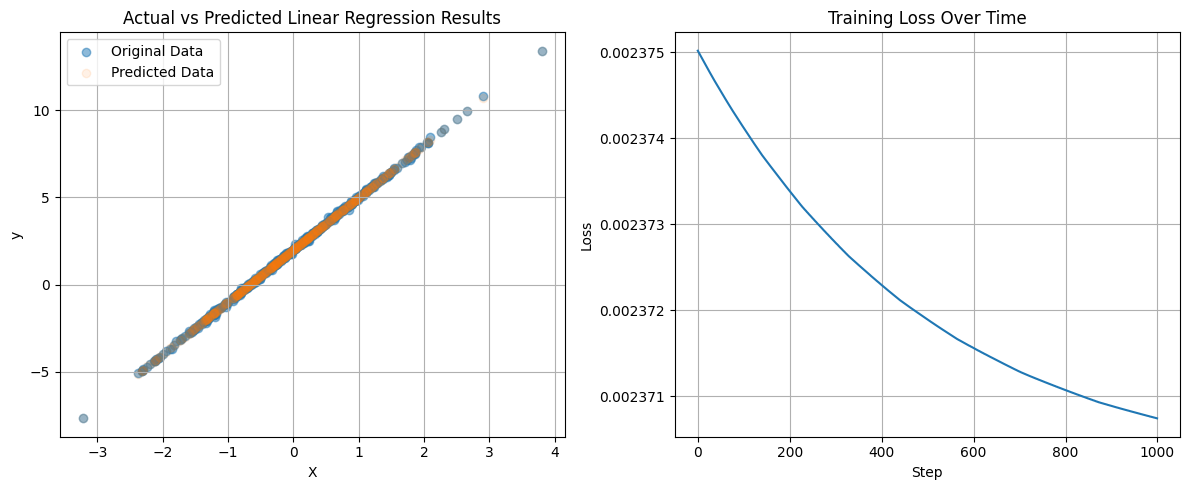

Training with hybrid_loss
Step 0, Loss: 0.0272
Step 100, Loss: 0.0272
Step 200, Loss: 0.0272
Step 300, Loss: 0.0272
Step 400, Loss: 0.0272
Step 500, Loss: 0.0272
Step 600, Loss: 0.0272
Step 700, Loss: 0.0272
Step 800, Loss: 0.0272
Step 900, Loss: 0.0272
Reducing learning rate to 0.000500 at step <function hybrid_loss at 0x7e556c31d080>

Training completed in 6.28 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.9986346], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.999976], dtype=float32)>, [0.02722971, 0.027229428, 0.027229136, 0.027228843, 0.02722856, 0.02722827, 0.02722799, 0.027227703, 0.02722742, 0.027227132, 0.027226875, 0.027226642, 0.027226431, 0.027226212, 0.027225994, 0.02722578, 0.027225558, 0.027225345, 0.02722513, 0.02722491, 0.027224697, 0.027224496, 0.027224341, 0.02722417, 0.027224017, 0.027223865, 0.027223706, 0.02722355, 0.027223386, 0.027223226, 0.027223077, 0.02722292, 0.027222762, 0.027222604, 0.0272

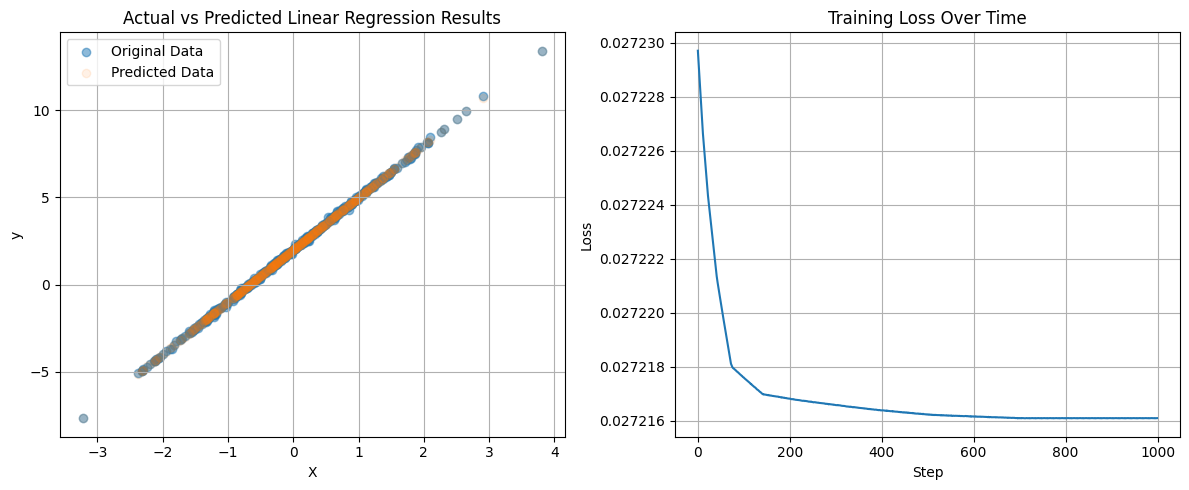

{'loss_history_mse_loss': [9.713659, 9.675676, 9.637842, 9.600156, 9.562617, 9.525226, 9.48798, 9.45088, 9.413926, 9.377115, 9.34045, 9.3039255, 9.267547, 9.231309, 9.195213, 9.159259, 9.1234455, 9.087771, 9.052237, 9.016841, 8.981584, 8.9464655, 8.911485, 8.876638, 8.841931, 8.807359, 8.7729225, 8.73862, 8.704452, 8.670417, 8.636515, 8.602745, 8.569109, 8.5356045, 8.502231, 8.468987, 8.435873, 8.40289, 8.370035, 8.33731, 8.304711, 8.272241, 8.239897, 8.207679, 8.175588, 8.143622, 8.111782, 8.080067, 8.048474, 8.017006, 7.985661, 7.954438, 7.9233375, 7.8923593, 7.8615017, 7.830765, 7.8001485, 7.769651, 7.7392745, 7.7090154, 7.6788745, 7.648853, 7.618947, 7.58916, 7.559489, 7.529933, 7.5004935, 7.4711695, 7.4419594, 7.412864, 7.383883, 7.355015, 7.3262587, 7.297616, 7.2690854, 7.240666, 7.212358, 7.184161, 7.156074, 7.128097, 7.10023, 7.072471, 7.0448217, 7.017279, 6.9898453, 6.962519, 6.935299, 6.908186, 6.881179, 6.8542767, 6.82748, 6.8007884, 6.774202, 6.747719, 6.7213387, 6.695063, 

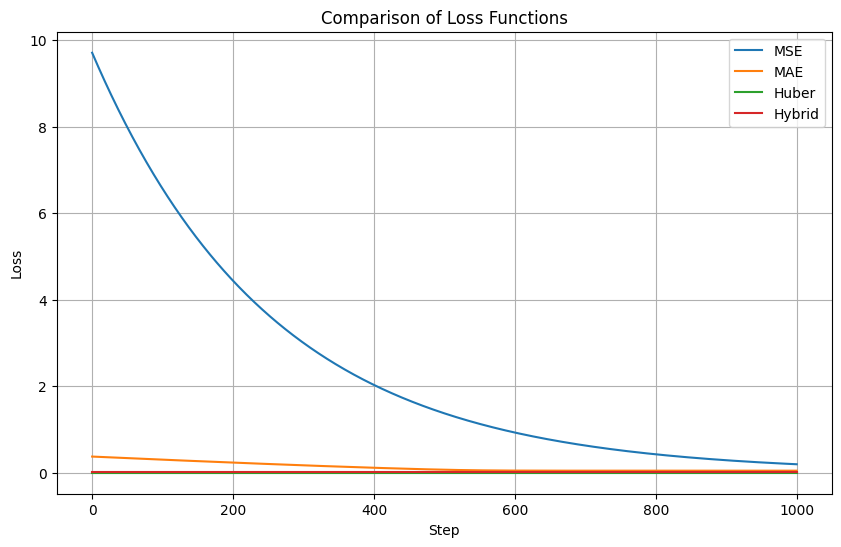

In [20]:
print("Using Laplacian Noise")
NUM_EXAMPLES = 500
TRAIN_STEPS = 1000
LEARNING_RATE = 0.001
patience = 300            # Number of steps to wait before reducing LR
lr_decay_factor = 0.5
patience_counter = 0

# Generate data
X = tf.random.normal([NUM_EXAMPLES])

# Initialize vweight and bias
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))


noise=np.random.laplace(loc=0.0, scale=0.05, size=([NUM_EXAMPLES]))
y = X * 3 + 2 + noise
train_model(X, y, W, b, LEARNING_RATE, TRAIN_STEPS,
            loss_fn=[mse_loss, mae_loss, huber_loss, hybrid_loss]
            )




## Change Learning Rate and using same level of Guassian Noise

Changing the Learning Rate
Training with mse_loss
Step 0, Loss: 12.1868
Step 100, Loss: nan
Step 200, Loss: nan
Reducing learning rate to 2.500000 at step <function mse_loss at 0x7e560b1f2520>
Step 300, Loss: nan
Step 400, Loss: nan
Step 500, Loss: nan
Reducing learning rate to 1.250000 at step <function mse_loss at 0x7e560b1f2520>
Step 600, Loss: nan
Step 700, Loss: nan
Step 800, Loss: nan
Reducing learning rate to 0.625000 at step <function mse_loss at 0x7e560b1f2520>
Step 900, Loss: nan

Training completed in 3.64 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, [12.186834, 731.7768, 48284.69, 3453059.5, 262012740.0, 20665575000.0, 1668434000000.0, 136517830000000.0, 1.1254205e+16, 9.315825e+17, 7.728521e+19, 6.4194157e+21, 5.335531e+23, 4.436212e+25, 3.689173e+27, 3.068245e+29, 2.5519653e+31, 2.1226204e+33, 1.765538e+35, inf, inf, inf, inf, inf, in

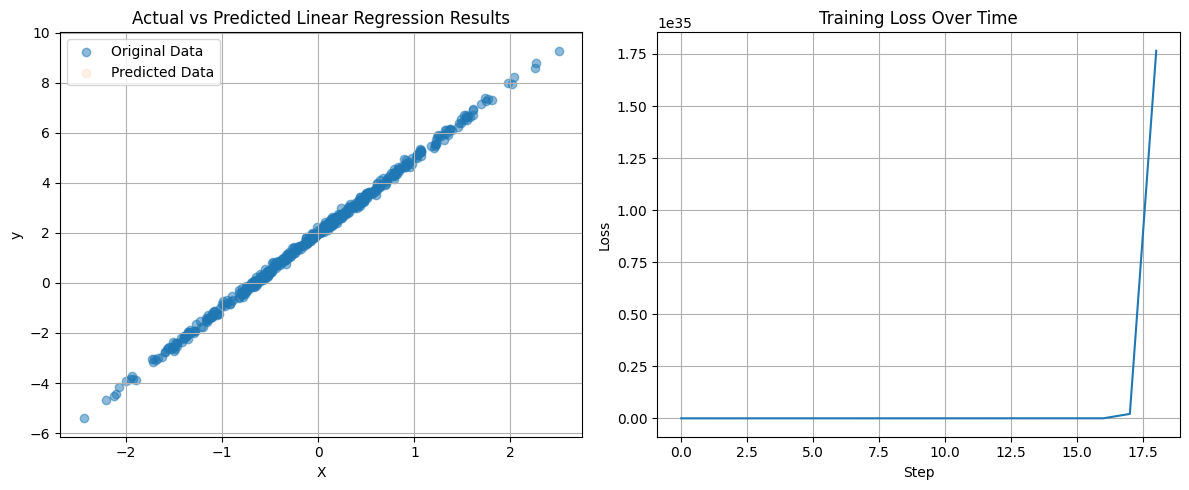

Training with mae_loss
Step 0, Loss: nan
Step 100, Loss: nan
Reducing learning rate to 0.312500 at step <function mae_loss at 0x7e556c31c220>
Step 200, Loss: nan
Step 300, Loss: nan
Step 400, Loss: nan
Reducing learning rate to 0.156250 at step <function mae_loss at 0x7e556c31c220>
Step 500, Loss: nan
Step 600, Loss: nan
Step 700, Loss: nan
Reducing learning rate to 0.078125 at step <function mae_loss at 0x7e556c31c220>
Step 800, Loss: nan
Step 900, Loss: nan

Training completed in 5.32 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

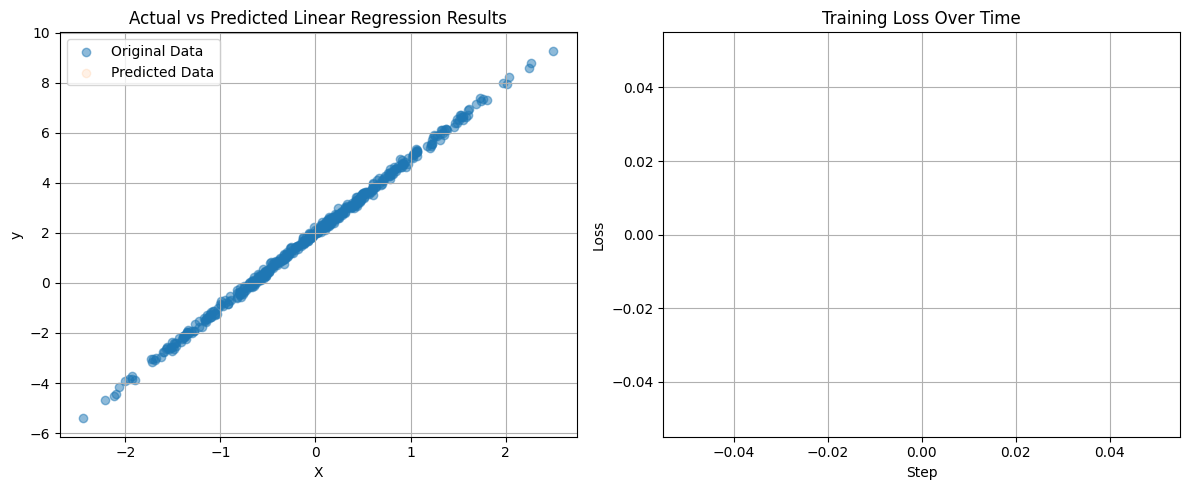

Training with huber_loss
Step 0, Loss: nan
Reducing learning rate to 0.039062 at step <function huber_loss at 0x7e556c31c180>
Step 100, Loss: nan
Step 200, Loss: nan
Step 300, Loss: nan
Reducing learning rate to 0.019531 at step <function huber_loss at 0x7e556c31c180>
Step 400, Loss: nan
Step 500, Loss: nan
Step 600, Loss: nan
Reducing learning rate to 0.009766 at step <function huber_loss at 0x7e556c31c180>
Step 700, Loss: nan
Step 800, Loss: nan
Step 900, Loss: nan

Training completed in 7.11 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

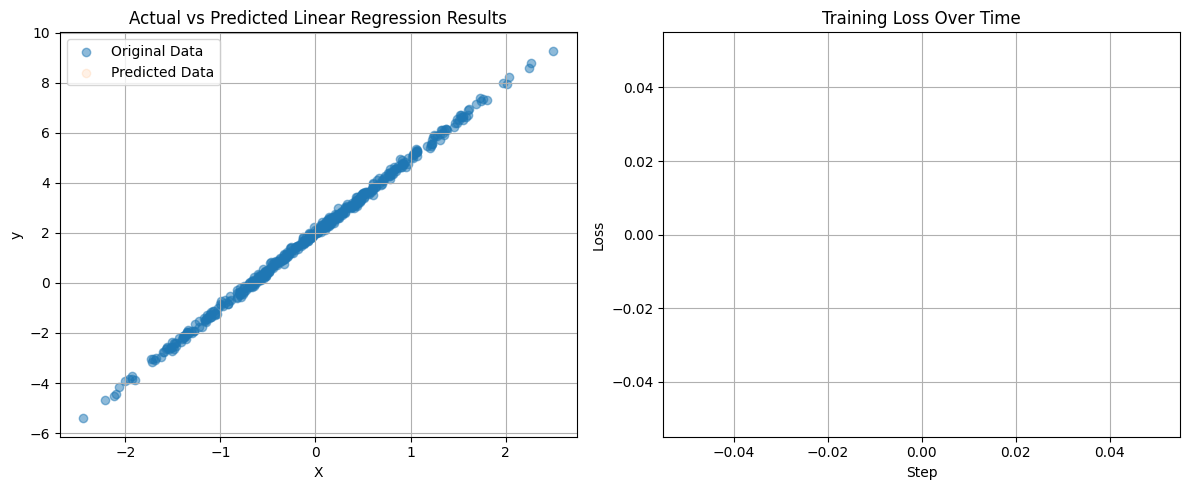

Training with hybrid_loss
Reducing learning rate to 0.004883 at step <function hybrid_loss at 0x7e556c31d080>
Step 0, Loss: nan
Step 100, Loss: nan
Step 200, Loss: nan
Reducing learning rate to 0.002441 at step <function hybrid_loss at 0x7e556c31d080>
Step 300, Loss: nan
Step 400, Loss: nan
Step 500, Loss: nan
Reducing learning rate to 0.001221 at step <function hybrid_loss at 0x7e556c31d080>
Step 600, Loss: nan
Step 700, Loss: nan
Step 800, Loss: nan
Reducing learning rate to 0.000610 at step <function hybrid_loss at 0x7e556c31d080>
Step 900, Loss: nan

Training completed in 6.20 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

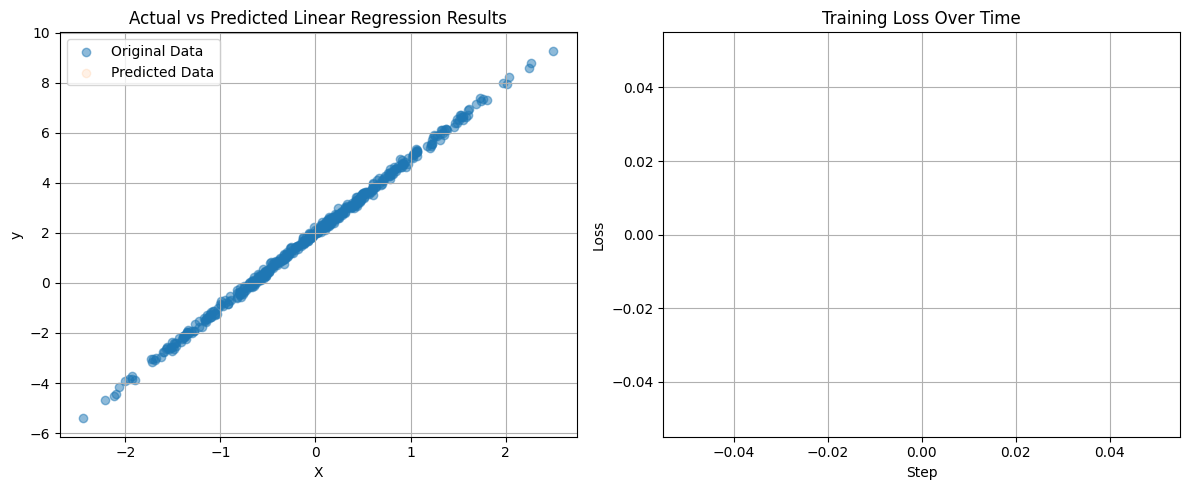

{'loss_history_mse_loss': [12.186834, 731.7768, 48284.69, 3453059.5, 262012740.0, 20665575000.0, 1668434000000.0, 136517830000000.0, 1.1254205e+16, 9.315825e+17, 7.728521e+19, 6.4194157e+21, 5.335531e+23, 4.436212e+25, 3.689173e+27, 3.068245e+29, 2.5519653e+31, 2.1226204e+33, 1.765538e+35, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

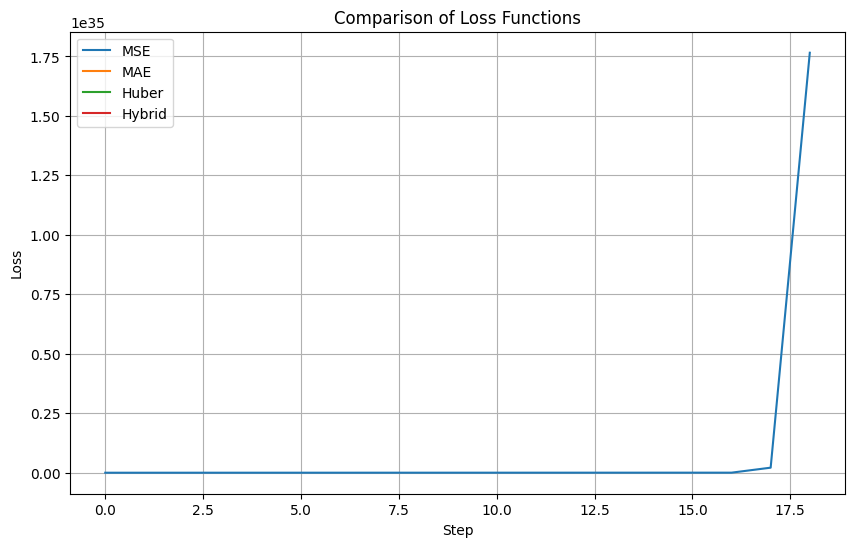

In [21]:
print("Changing the Learning Rate")
NUM_EXAMPLES = 500
TRAIN_STEPS = 1000
LEARNING_RATE = 5
patience = 300            # Number of steps to wait before reducing LR
lr_decay_factor = 0.5
patience_counter = 0

# Generate data
X = tf.random.normal([NUM_EXAMPLES])

# Initialize vweight and bias
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

# Generate data with noise
noise = tf.random.normal([NUM_EXAMPLES], mean=0.0, stddev=0.1)
y = X * 3 + 2 + noise

train_model(X, y, W, b, LEARNING_RATE,
            TRAIN_STEPS,
            loss_fn=[mse_loss, mae_loss, huber_loss, hybrid_loss]
            )

## Change Learning Rate and using same level of Laplacian Noise

Changing the Learning Rate to 5
Training with mse_loss
Step 0, Loss: 9.9626
Step 100, Loss: nan
Step 200, Loss: nan
Reducing learning rate to 2.500000 at step <function mse_loss at 0x7e560b1f2520>
Step 300, Loss: nan
Step 400, Loss: nan
Step 500, Loss: nan
Reducing learning rate to 1.250000 at step <function mse_loss at 0x7e560b1f2520>
Step 600, Loss: nan
Step 700, Loss: nan
Step 800, Loss: nan
Reducing learning rate to 0.625000 at step <function mse_loss at 0x7e560b1f2520>
Step 900, Loss: nan

Training completed in 3.56 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, [9.962599, 833.30743, 69754.74, 5840761.0, 489197730.0, 40983900000.0, 3434399000000.0, 287866960000000.0, 2.4134132e+16, 2.023791e+18, 1.6974197e+20, 1.4239618e+22, 1.19478135e+24, 1.002665e+26, 8.4158255e+27, 7.064923e+29, 5.9317725e+31, 4.9810916e+33, 4.1833535e+35, inf, inf, inf, inf

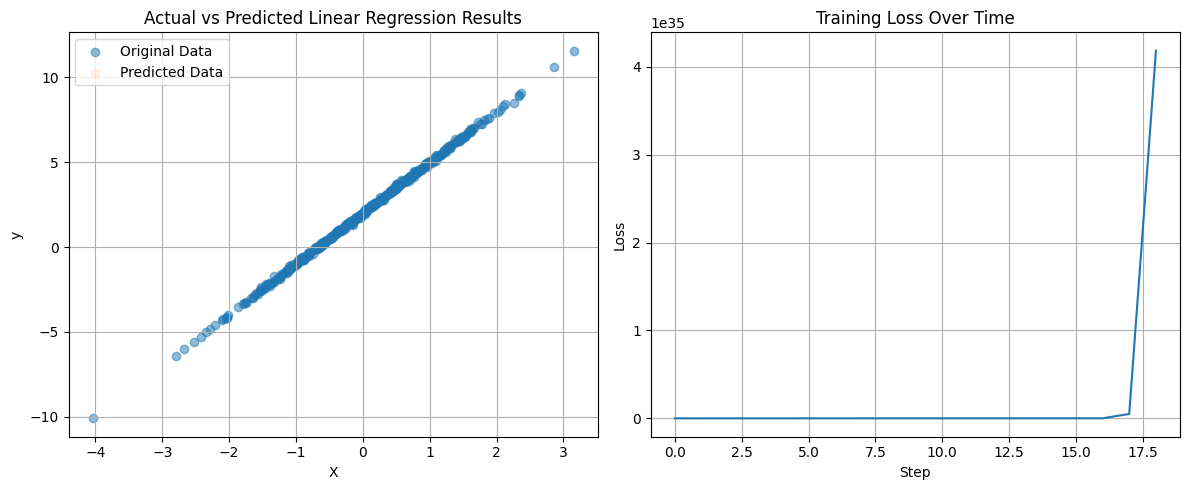

Training with mae_loss
Step 0, Loss: nan
Step 100, Loss: nan
Reducing learning rate to 0.312500 at step <function mae_loss at 0x7e556c31c220>
Step 200, Loss: nan
Step 300, Loss: nan
Step 400, Loss: nan
Reducing learning rate to 0.156250 at step <function mae_loss at 0x7e556c31c220>
Step 500, Loss: nan
Step 600, Loss: nan
Step 700, Loss: nan
Reducing learning rate to 0.078125 at step <function mae_loss at 0x7e556c31c220>
Step 800, Loss: nan
Step 900, Loss: nan

Training completed in 3.75 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

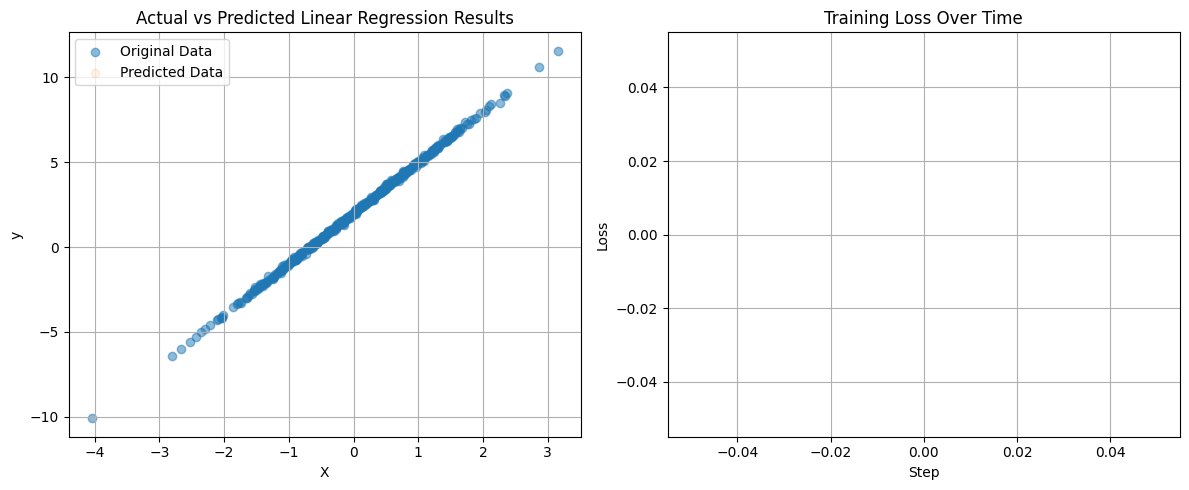

Training with huber_loss
Step 0, Loss: nan
Reducing learning rate to 0.039062 at step <function huber_loss at 0x7e556c31c180>
Step 100, Loss: nan
Step 200, Loss: nan
Step 300, Loss: nan
Reducing learning rate to 0.019531 at step <function huber_loss at 0x7e556c31c180>
Step 400, Loss: nan
Step 500, Loss: nan
Step 600, Loss: nan
Reducing learning rate to 0.009766 at step <function huber_loss at 0x7e556c31c180>
Step 700, Loss: nan
Step 800, Loss: nan
Step 900, Loss: nan

Training completed in 7.51 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

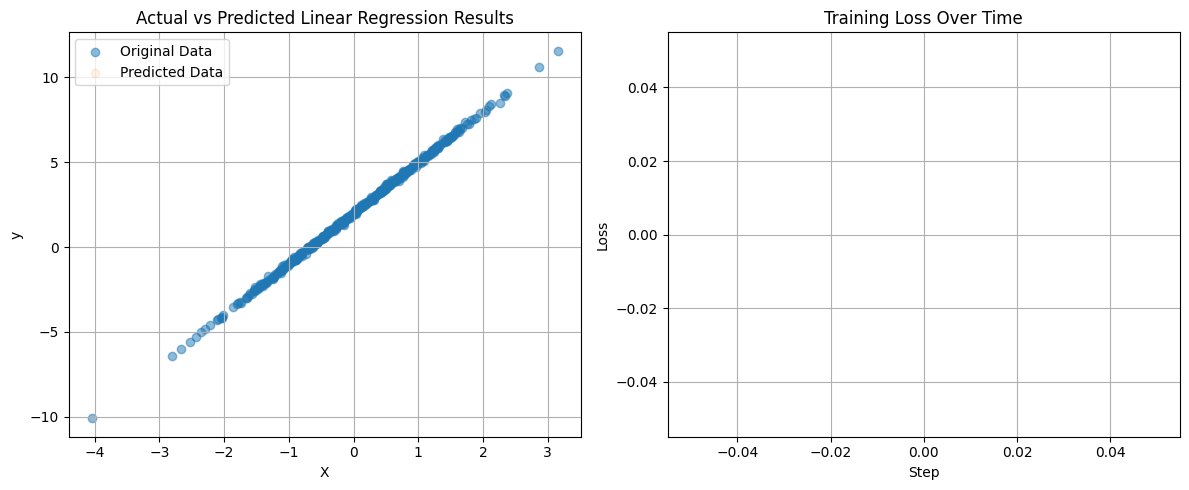

Training with hybrid_loss
Reducing learning rate to 0.004883 at step <function hybrid_loss at 0x7e556c31d080>
Step 0, Loss: nan
Step 100, Loss: nan
Step 200, Loss: nan
Reducing learning rate to 0.002441 at step <function hybrid_loss at 0x7e556c31d080>
Step 300, Loss: nan
Step 400, Loss: nan
Step 500, Loss: nan
Reducing learning rate to 0.001221 at step <function hybrid_loss at 0x7e556c31d080>
Step 600, Loss: nan
Step 700, Loss: nan
Step 800, Loss: nan
Reducing learning rate to 0.000610 at step <function hybrid_loss at 0x7e556c31d080>
Step 900, Loss: nan

Training completed in 6.36 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([nan], dtype=float32)>, [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

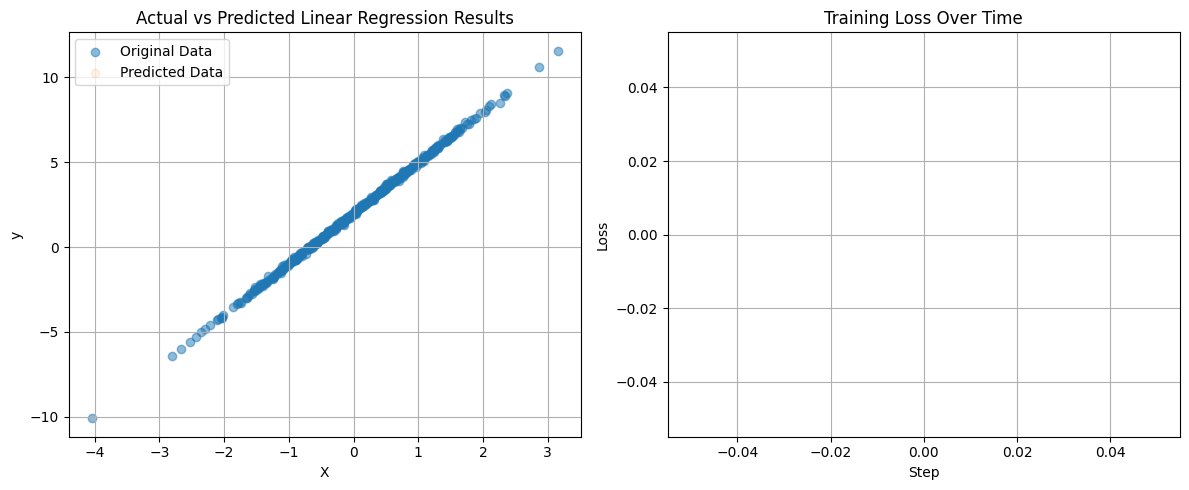

{'loss_history_mse_loss': [9.962599, 833.30743, 69754.74, 5840761.0, 489197730.0, 40983900000.0, 3434399000000.0, 287866960000000.0, 2.4134132e+16, 2.023791e+18, 1.6974197e+20, 1.4239618e+22, 1.19478135e+24, 1.002665e+26, 8.4158255e+27, 7.064923e+29, 5.9317725e+31, 4.9810916e+33, 4.1833535e+35, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

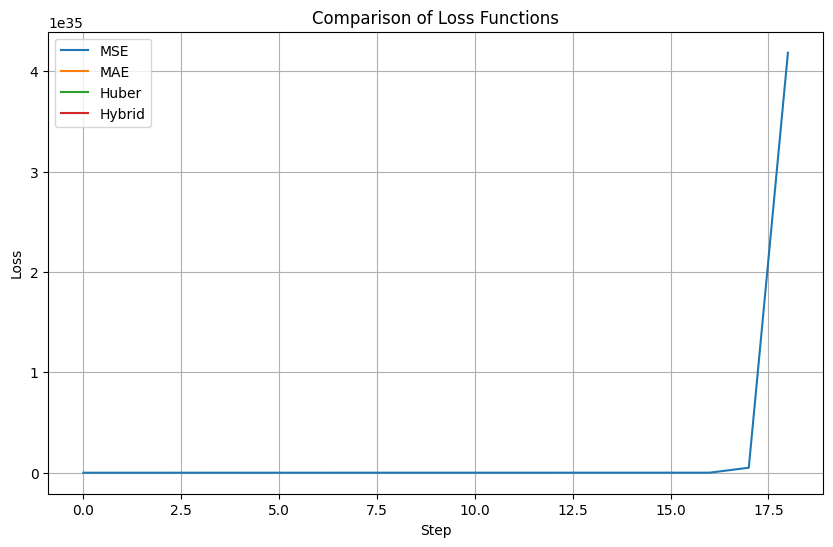

In [22]:
print("Changing the Learning Rate to 5")
NUM_EXAMPLES = 500
TRAIN_STEPS = 1000
LEARNING_RATE = 5
patience = 300            # Number of steps to wait before reducing LR
lr_decay_factor = 0.5
patience_counter = 0

# Generate data
X = tf.random.normal([NUM_EXAMPLES])

# Initialize vweight and bias
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

noise=np.random.laplace(loc=0.0, scale=0.05, size=([NUM_EXAMPLES]))
y = X * 3 + 2 + noise
train_model(X, y, W, b, LEARNING_RATE, TRAIN_STEPS,
            loss_fn=[mse_loss, mae_loss, huber_loss, hybrid_loss]
            )



## Using Learning rate = 1.0

Changing the Learning Rate to 5
Training with mse_loss
Step 0, Loss: 18.0236
Step 100, Loss: 193707556864.0000
Step 200, Loss: 5755854214208486899712.0000
Reducing learning rate to 0.500000 at step <function mse_loss at 0x7e560b1f2520>
Step 300, Loss: 171030256092868307145839463104512.0000
Step 400, Loss: 0.0049
Step 500, Loss: 0.0049
Step 600, Loss: 0.0049
Reducing learning rate to 0.250000 at step <function mse_loss at 0x7e560b1f2520>
Step 700, Loss: 0.0049
Step 800, Loss: 0.0049
Step 900, Loss: 0.0049
Reducing learning rate to 0.125000 at step <function mse_loss at 0x7e560b1f2520>

Training completed in 3.59 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([3.000315], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.0012648], dtype=float32)>, [18.023636, 19.640202, 21.743853, 24.46679, 27.97725, 32.489365, 38.275665, 45.683044, 55.152958, 67.24731, 82.681206, 102.36485, 127.4565, 159.43051, 200.16324, 252.04262, 318.1079, 40

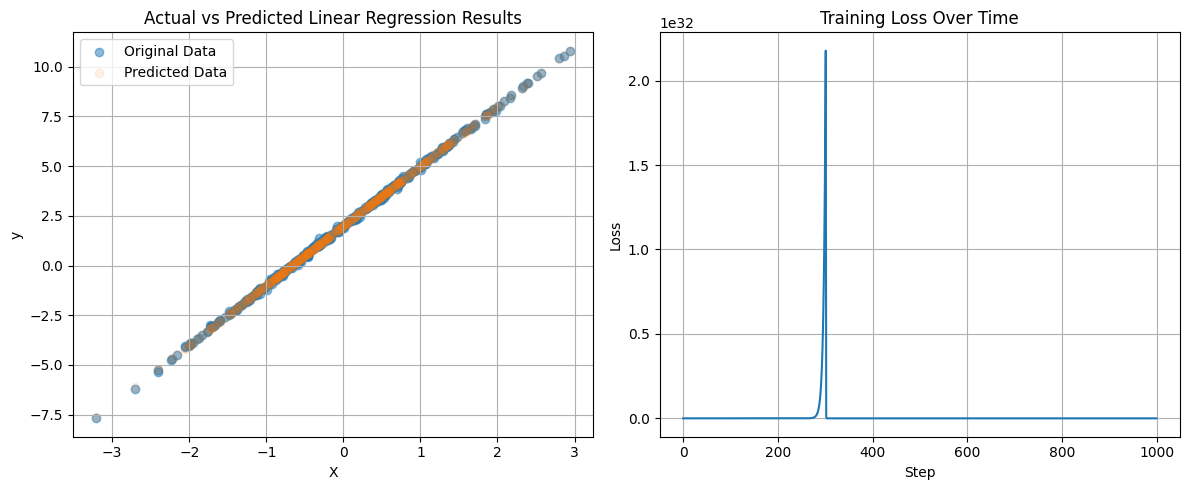

Training with mae_loss
Step 0, Loss: 0.0503
Step 100, Loss: 0.0528
Step 200, Loss: 0.0528
Reducing learning rate to 0.062500 at step <function mae_loss at 0x7e556c31c220>
Step 300, Loss: 0.0528
Step 400, Loss: 0.0503
Step 500, Loss: 0.0503
Step 600, Loss: 0.0503
Reducing learning rate to 0.031250 at step <function mae_loss at 0x7e556c31c220>
Step 700, Loss: 0.0503
Step 800, Loss: 0.0503
Step 900, Loss: 0.0503

Training completed in 3.66 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.9998312], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.001577], dtype=float32)>, [0.050312582, 0.050350178, 0.050508767, 0.050699707, 0.05131556, 0.051417444, 0.05163393, 0.05191017, 0.051576164, 0.05196958, 0.052059393, 0.052724015, 0.051770136, 0.05235369, 0.05181914, 0.052304186, 0.05182663, 0.0522982, 0.051797703, 0.05239615, 0.05169711, 0.051963996, 0.051701996, 0.051929895, 0.051803436, 0.05218722, 0.051721744, 0.051801372, 0.05205816

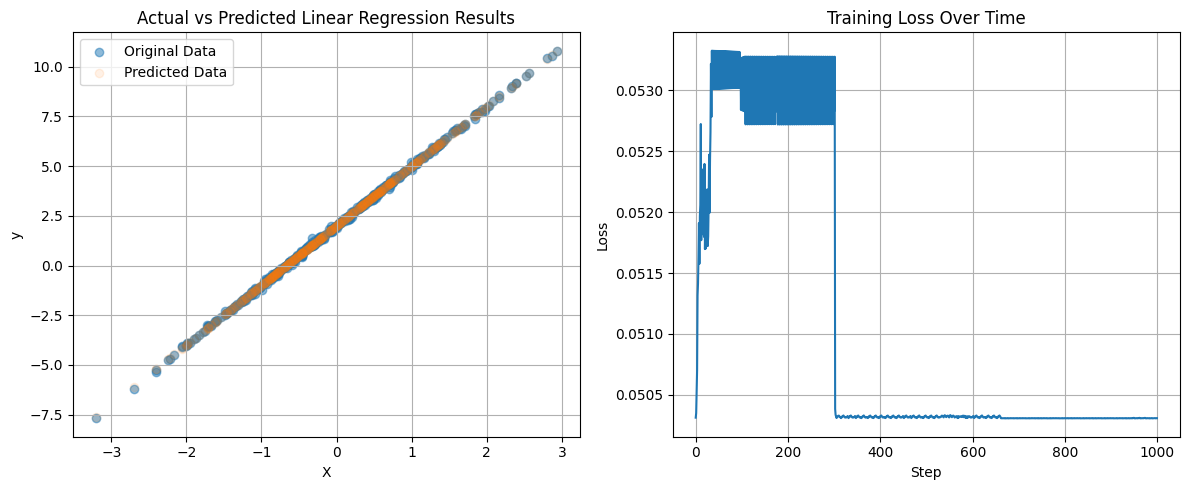

Training with huber_loss
Step 0, Loss: 0.0025
Step 100, Loss: 0.0025
Step 200, Loss: 0.0025
Step 300, Loss: 0.0025
Step 400, Loss: 0.0025
Reducing learning rate to 0.015625 at step <function huber_loss at 0x7e556c31c180>
Step 500, Loss: 0.0025
Step 600, Loss: 0.0025
Step 700, Loss: 0.0025
Reducing learning rate to 0.007812 at step <function huber_loss at 0x7e556c31c180>
Step 800, Loss: 0.0025
Step 900, Loss: 0.0025

Training completed in 7.99 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([3.0003114], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.0012684], dtype=float32)>, [0.0024577095, 0.002457698, 0.0024576867, 0.0024576774, 0.0024576678, 0.0024576592, 0.0024576513, 0.0024576434, 0.0024576364, 0.0024576297, 0.0024576243, 0.0024576182, 0.0024576122, 0.002457608, 0.002457602, 0.0024575987, 0.0024575943, 0.0024575903, 0.0024575868, 0.002457583, 0.0024575798, 0.0024575773, 0.0024575745, 0.0024575714, 0.002457569, 0.00245756

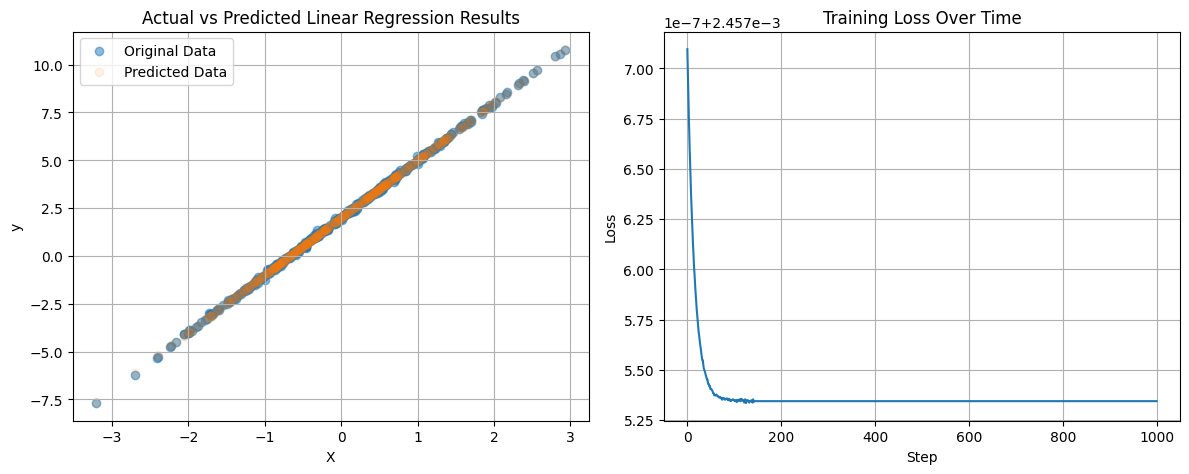

Training with hybrid_loss
Step 0, Loss: 0.0276
Step 100, Loss: 0.0276
Step 200, Loss: 0.0276
Step 300, Loss: 0.0276
Step 400, Loss: 0.0276
Reducing learning rate to 0.003906 at step <function hybrid_loss at 0x7e556c31d080>
Step 500, Loss: 0.0276
Step 600, Loss: 0.0276
Step 700, Loss: 0.0276
Reducing learning rate to 0.001953 at step <function hybrid_loss at 0x7e556c31d080>
Step 800, Loss: 0.0276
Step 900, Loss: 0.0276

Training completed in 5.75 seconds
(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.9998581], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([2.001455], dtype=float32)>, [0.027613785, 0.027613264, 0.02761275, 0.02761225, 0.027611947, 0.027611792, 0.027611637, 0.027611546, 0.02761147, 0.0276114, 0.027611328, 0.027611261, 0.027611217, 0.027611172, 0.02761115, 0.027611174, 0.027611148, 0.027611183, 0.027611159, 0.02761116, 0.027611168, 0.027611155, 0.027611151, 0.027611157, 0.027611164, 0.027611151, 0.02761118, 0.02761114

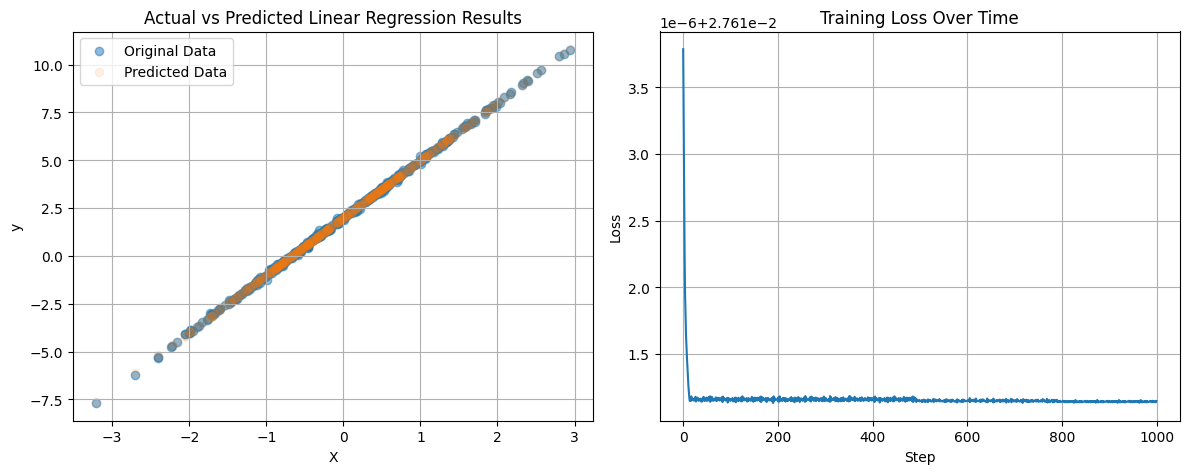

{'loss_history_mse_loss': [18.023636, 19.640202, 21.743853, 24.46679, 27.97725, 32.489365, 38.275665, 45.683044, 55.152958, 67.24731, 82.681206, 102.36485, 127.4565, 159.43051, 200.16324, 252.04262, 318.1079, 402.22754, 509.32416, 645.66364, 819.2202, 1040.1431, 1321.3489, 1679.2758, 2134.848, 2714.693, 3452.701, 4392.0044, 5587.4966, 7109.043, 9045.562, 11510.222, 14647.046, 18639.346, 23720.422, 30187.193, 38417.54, 48892.43, 62223.95, 79191.125, 100785.45, 128268.82, 163247.27, 207764.69, 264422.44, 336531.3, 428305.1, 545106.56, 693761.1, 882955.4, 1123744.8, 1430199.9, 1820228.2, 2316622.2, 2948387.2, 3752441.5, 4775770.0, 6078170.5, 7735749.0, 9845367.0, 12530299.0, 15947438.0, 20296466.0, 25831526.0, 32876058.0, 41841708.0, 53252384.0, 67774860.0, 86257740.0, 109781176.0, 139719620.0, 177822700.0, 226316880.0, 288035870.0, 366586240.0, 466557950.0, 593793200.0, 755726850.0, 961821800.0, 1224120800.0, 1557952000.0, 1982822800.0, 2523558700.0, 3211759900.0, 4087640800.0, 520238340

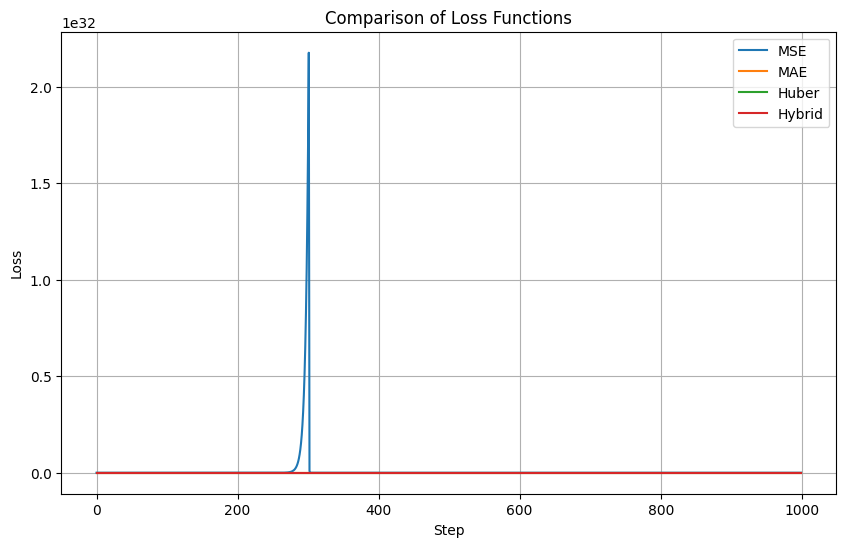

In [23]:
print("Changing the Learning Rate to 5")
NUM_EXAMPLES = 500
TRAIN_STEPS = 1000
LEARNING_RATE = 1
patience = 300            # Number of steps to wait before reducing LR
lr_decay_factor = 0.5
patience_counter = 0

# Generate data
X = tf.random.normal([NUM_EXAMPLES])

# Initialize vweight and bias
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

noise=np.random.laplace(loc=0.0, scale=0.05, size=([NUM_EXAMPLES]))
y = X * 3 + 2 + noise
train_model(X, y, W, b, LEARNING_RATE, TRAIN_STEPS,
            loss_fn=[mse_loss, mae_loss, huber_loss, hybrid_loss]
            )

In [24]:
fullyfinishtime=time.time()

print("Total execution time"(fullyfinishtime-begintime))

<>:3: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<>:3: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<ipython-input-24-93612dbba3d7>:3: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  print("Total execution time"(fullyfinishtime-begintime))


TypeError: 'str' object is not callable